# Reference: Model Code

## Initialization

In [1]:
# Run dependencies
%run ./model_python_lib_utils.ipynb
%run ./model_python_lib_event_counts.ipynb
%run ./model_python_lib_decision_functions.ipynb
%run ./python_lib_visualization.ipynb

%run ./model_wrapper.ipynb

KeyboardInterrupt: 

KeyboardInterrupt: 

## Model Fit

In [2]:
# Read data
df = read_rps_data(os.path.join("data", DEFAULT_FILE))
df.head()

,game_id,version,is_sona_autocredit,sona_experiment_id,sona_credit_token,sona_survey_code,round_index,player_id,is_bot,bot_strategy,bot_move_probabilities,round_begin_ts,player_move,player_rt,player_outcome,player_outcome_viewtime,player_points,player_total
0,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904283047,rock,2091,tie,3951,0,0
1,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904283047,rock,0,tie,0,0,0
2,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904289171,paper,2886,loss,1741,-1,0
3,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904289171,scissors,0,win,0,3,0
4,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,3,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,{'win': {'0': {'rock': {'rock': 0.049999999999...,1583904293847,scissors,1676,tie,2040,0,-1


## Human performance: benchmark


<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

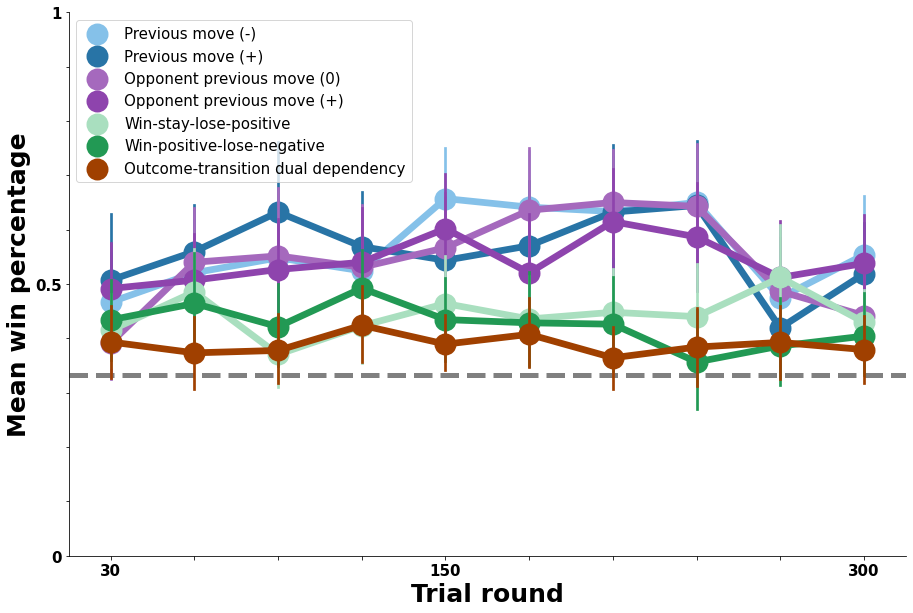

In [4]:
# Plot human win rates
f_a = groupby_f_data(df_agent, 'player_outcome', bins=60)
f_a = f_a[f_a['bin']<='50']
plot_win_rates(f_a[f_a['player_outcome']=='win']) # NB: add a filename argument to save the figure locally

## Null model: move base rates

*Run model*

In [5]:
model1 = df_agent.copy()

model1['ev_rock'] = model1['ev_move_baserate_rock']
model1['ev_paper'] = model1['ev_move_baserate_paper']
model1['ev_scissors'] = model1['ev_move_baserate_scissors']

# Compute softmax distribution (1 min.)
m1_softmax = get_softmax_probabilities(
    model1, 
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above (1 min.)
model1 = pick_move(model1, m1_softmax)
# model1.head(25)

# Evaluate outcome of agent move choices in simulation above
model1 = assign_agent_outcomes(model1)
# model1.head(25)

# runtime: 1-2 mins?

*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

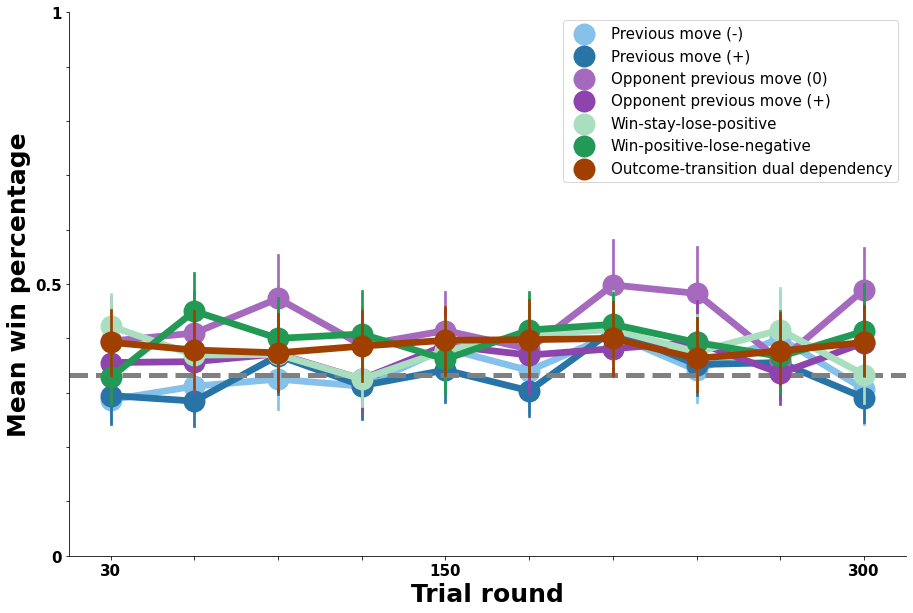

In [6]:
# Plot agent win rates
f_b = groupby_f_data(model1, 'agent_outcome', bins=60)
f_b = f_b[f_b['bin']<='50']
plot_win_rates(f_b[f_b['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## Transition model: bot transitions only

*Run model*

In [7]:
import time
start = time.time()

model2 = df_agent.copy()

model2['ev_rock'] = model2['ev_move_baserate_rock'] + model2['ev_transition_rock']
model2['ev_paper'] = model2['ev_move_baserate_paper'] + model2['ev_transition_paper']
model2['ev_scissors'] = model2['ev_move_baserate_scissors'] + model2['ev_transition_scissors']

# Compute softmax distribution (1 min.)
m2_softmax = get_softmax_probabilities(
    model2, 
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above (1 min.)
model2 = pick_move(model2, m2_softmax)

# Evaluate outcome of agent move choices in simulation above
model2 = assign_agent_outcomes(model2)
# model2.head(25)

end = time.time()
print(end - start)

# runtime: about 1 min

74.33586931228638


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

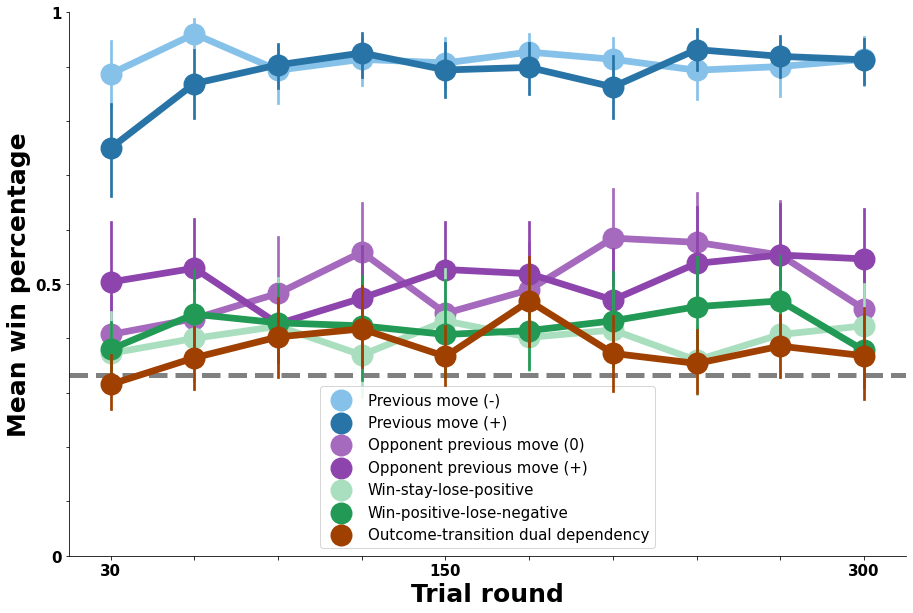

In [9]:
# Plot agent win rates
f_c = groupby_f_data(model2, 'agent_outcome', bins=60)
f_c = f_c[f_c['bin']<='50']
plot_win_rates(f_c[f_c['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## Transition model: bot Cournot transitions only

*Run model*

In [10]:
start = time.time()

model3 = df_agent.copy()

model3['ev_rock'] = model3['ev_move_baserate_rock'] + model3['ev_cournot_transition_rock']
model3['ev_paper'] = model3['ev_move_baserate_paper'] + model3['ev_cournot_transition_paper']
model3['ev_scissors'] = model3['ev_move_baserate_scissors'] + model3['ev_cournot_transition_scissors']

# Compute softmax distribution (1 min.)
m3_softmax = get_softmax_probabilities(
    model3, 
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above (1 min.)
model3 = pick_move(model3, m3_softmax)

# Evaluate outcome of agent move choices in simulation above
model3 = assign_agent_outcomes(model3)
# model3.head(25)

end = time.time()
print(end - start)

72.48529481887817


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

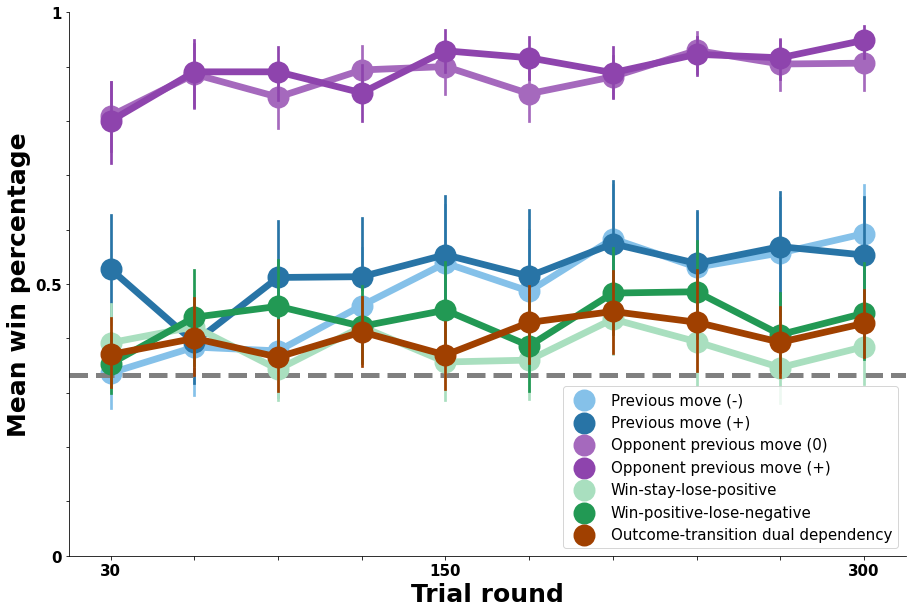

In [12]:
# Plot agent win rates
f_d = groupby_f_data(model3, 'agent_outcome', bins=60)
f_d = f_d[f_d['bin']<='50']
plot_win_rates(f_d[f_d['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## Transition model: bot transitions + Cournot transitions

*Run model*

In [13]:
start = time.time()

model4 = df_agent.copy()

model4['ev_rock'] = model4['ev_move_baserate_rock'] + model4['ev_transition_rock'] + model4['ev_cournot_transition_rock']
model4['ev_paper'] = model4['ev_move_baserate_paper'] + model4['ev_transition_paper'] + model4['ev_cournot_transition_paper']
model4['ev_scissors'] = model4['ev_move_baserate_scissors'] + model4['ev_transition_scissors']+ model4['ev_cournot_transition_scissors']

# Compute softmax distribution (1 min.)
m4_softmax = get_softmax_probabilities(
    model4, 
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above (1 min.)
model4 = pick_move(model4, m4_softmax)

# Evaluate outcome of agent move choices in simulation above
model4 = assign_agent_outcomes(model4)
# model4.head(25)

end = time.time()
print(end- start)

# runtime: about 1 min

76.50155401229858


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

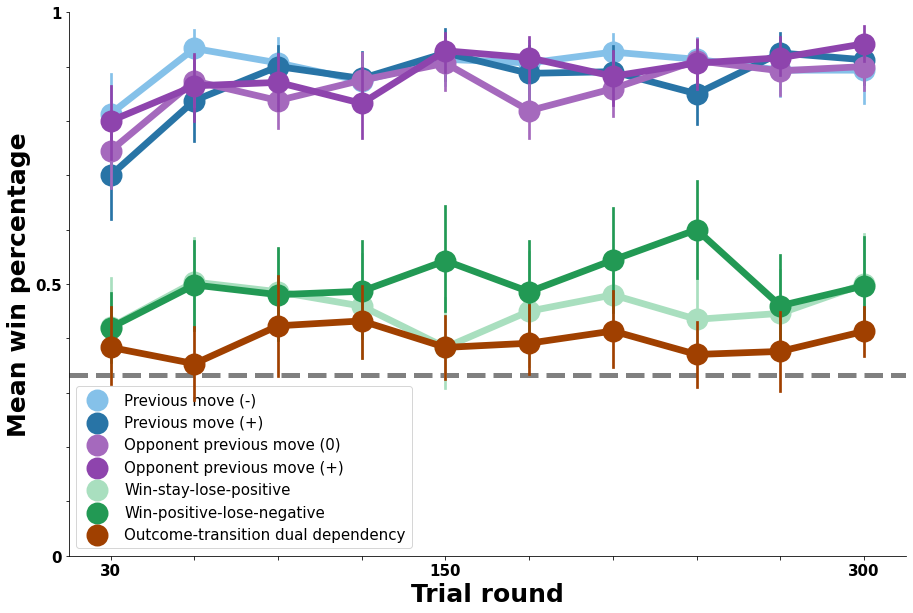

In [14]:
# Plot agent win rates
f_e = groupby_f_data(model4, 'agent_outcome', bins=60)
f_e = f_e[f_e['bin']<='50']
plot_win_rates(f_e[f_e['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## Outcome-transition model: outcome-transitions only

*Run model*

In [15]:
start = time.time()

model5 = df_agent.copy()

model5['ev_rock'] = model5['ev_outcome_transition_rock']
model5['ev_paper'] = model5['ev_outcome_transition_paper']
model5['ev_scissors'] = model5['ev_outcome_transition_scissors']

# Compute softmax distribution (1 min.)
m5_softmax = get_softmax_probabilities(
    model5, 
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above (1 min.)
model5 = pick_move(model5, m5_softmax)

# Evaluate outcome of agent move choices in simulation above
model5 = assign_agent_outcomes(model5)

end = time.time()
print(end - start)

# runtime: about 1 min

72.51381182670593


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

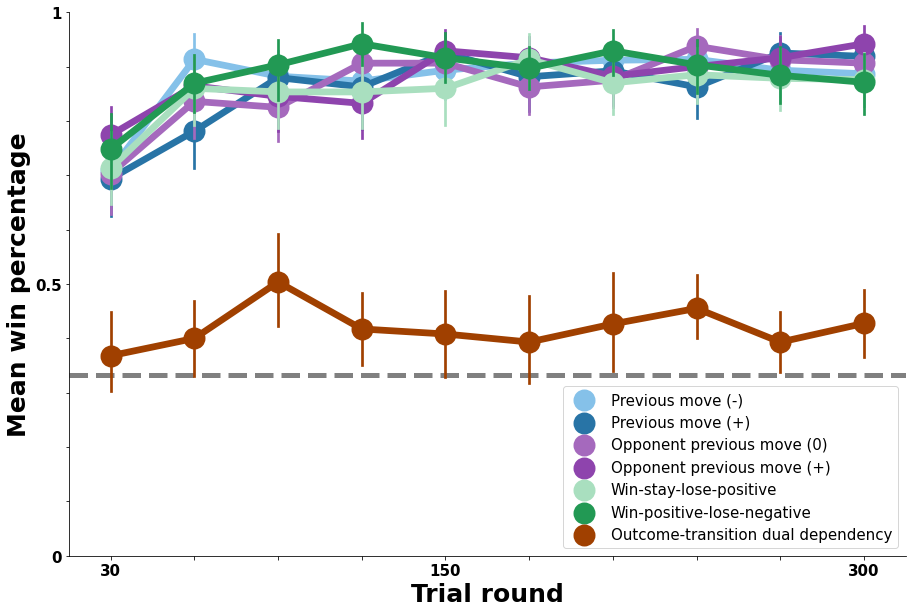

In [16]:
# Plot agent win rates
f_f = groupby_f_data(model5, 'agent_outcome', bins=60)
f_f = f_f[f_f['bin']<='50']
plot_win_rates(f_f[f_f['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally

## Dual-transition outcome model: complex strategy only

*Run model*

In [17]:
start = time.time()

model6 = df_agent.copy()


model6['ev_rock'] = model6['ev_outcome_dual_depend_rock']
model6['ev_paper'] = model6['ev_outcome_dual_depend_paper']
model6['ev_scissors'] = model6['ev_outcome_dual_depend_scissors']

# Compute softmax distribution (1 min.)
m6_softmax = get_softmax_probabilities(
    model6, 
    ['ev_rock', 'ev_paper', 'ev_scissors']
)

# Select agent move based on softmax computed above (1 min.)
model6 = pick_move(model6, m6_softmax)

# Evaluate outcome of agent move choices in simulation above
model6 = assign_agent_outcomes(model6)

end = time.time()
print(end - start)
# runtime: about 1 min

73.05872225761414


*Plot model results*

<ipython-input-1-d28ed19b175e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-1-d28ed19b175e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-1-d28ed19b175e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

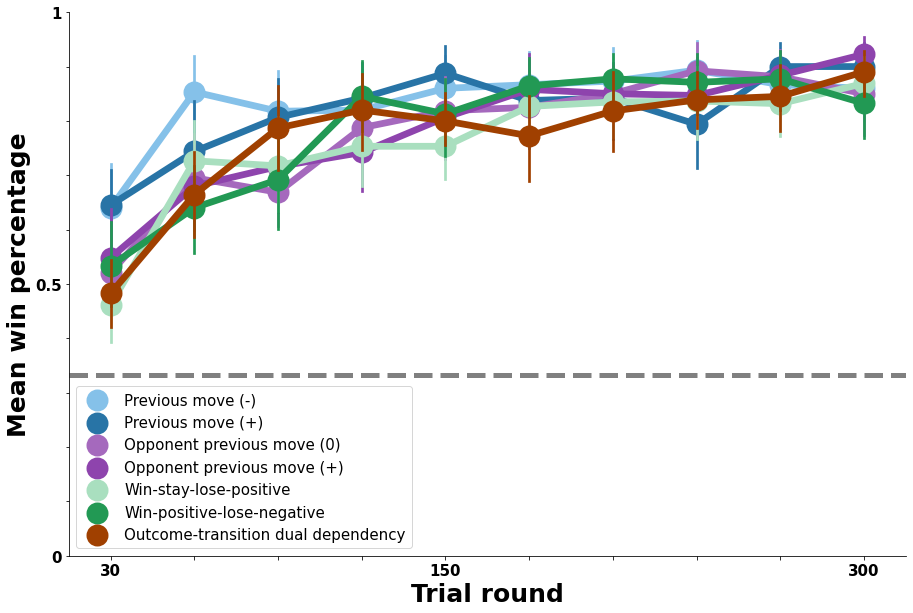

In [18]:
# Plot agent win rates
f_g = groupby_f_data(model6, 'agent_outcome', bins=60)
f_g = f_g[f_g['bin']<='50']
plot_win_rates(f_g[f_g['agent_outcome']=='win']) # NB: add a filename argument to save the figure locally